
### Universidade Federal de Pernambuco - IF998 (Solução em Mineração de Dados)

### Professor: Leandro Almeida - lma3@cin.ufpe.br

### Alunos: 
- Daniel Moraes Costa Andrade - dmca@cin.ufpe.br
- Gustavo Prazeres Paz do Nascimento - gppn@cin.ufpe.br
- Vinicius Luiz da Silva Franca - vlsf2@cin.ufpe.br

### Aula 04 - Aprendizagem em Instâncias
### -------------------------------------------------------

Realizar as atividades de preparação dos dados para o domínio Credit Approval Data Set (https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Apresentar relatório com a justificativa da escolha de cada item da preparação dos dados juntamente com o script.


Realizar uma análise de métodos para normalização/reescala dos dados numéricos. Qual o método mais apropriado para a base de dados e por que?

Realizar uma análise de métodos para seleção de características. Quais métodos seriam mais apropriados para a base de dados e por que?

# Missão 04

Realizar a comparação dos algoritmos K-NN e LVQ usando a base de dados Credit Approval:  
Realizar a tarefa de classificação da base de dados 
Credit Approval Data Set (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) com os algoritmos K-NN e LVQ.  
Entregar o script e uma análise crítica curta sobre o desempenho dos dois algoritmos  
Sugestões: procurar scripts em Python e realizar as etapas do crisp-dm já discutidas na disciplina.

# Importando bibliotecas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
dt_parameters = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Class']
dataset = pd.read_csv(url, delimiter=",", names=dt_parameters)

no_registros = dataset.shape[0]
no_atributos = dataset.shape[1]

print(f'Carregado com sucesso! \n\nO Dataset possui {no_registros} registros com {no_atributos} atributos cada\n')

print('Exibindo os 10 primeiros registros:')
dataset.head(10)

Carregado com sucesso! 

O Dataset possui 690 registros com 16 atributos cada

Exibindo os 10 primeiros registros:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


# Descrevendo o Dataset

Pandas describe() é usado para visualizar alguns detalhes estatísticos básicos como percentil, média, std etc. de um quadro de dados ou uma série de `valores numéricos`

In [3]:
dataset.describe([.20, .40, .60, .80])

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
20%,0.750000,0.125000,0.00000,0.000000
40%,1.934000,0.500000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
60%,4.016000,1.500000,1.00000,50.000000
80%,9.432000,3.500000,4.00000,600.000000
max,28.000000,28.500000,67.00000,100000.000000


# Técnicas de Pré-Processamento 
Conjunto de técnicas de mineração de dados usadas para preparar e transformar dados brutos em formatos úteis e eficientes.

**1. Limpeza de dados**

Envolve o manuseio e/ou preenchimento de dados ausentes, redução de ruídos, identificação e remoção de valores aberrantes e a resolução de inconsistências

- **1.1. De dados faltantes**
> Ocorre quando alguns dados estão ausentes, atributos com valores faltosos, ausência de atributos de interesse, ou existência de apenas dados agregados
> 
O que fazer?
> - Remover os registros com atributos nulos;
> - Realizar uma média com os valores do mesmo atributo;
> - Realizar uma mediana com os valores do mesmo atributo;
> - Preencher o atributo faltante com os valores que mais ocorrem no dataset.

- **1.2 - Dados ruidosos e/ou aberrantes - inconsistentes**
> Dados sem sentido que não podem ser interpretados por máquinas. Eles podem ser gerados devido a falhas na coleta de dados, erros de entrada de dados, entre outras situações difíceis de prever.
>
O que fazer?
> - **Método de Binning:** Processo de suavização de dados, usado para minimizar os efeitos de pequenos erros de observação. Os valores dos dados originais são divididos em pequenos intervalos conhecidos como compartimentos e, em seguida, são substituídos por um valor geral calculado para esse compartimento. Pode-se substituir todos os dados em um segmento por seus valores médios ou limites.
> - **Regressão:** Aqui os dados podem ser suavizados ajustando-os a uma função de regressão. Ela pode ser linear (com uma variável independente) ou múltipla (com várias variáveis ​​independentes).
> - **Agrupamento:** Essa abordagem agrupa os dados semelhantes em um cluster. Os outliers podem ser tratados separadamente ou deixados de fora dos clusters.
Alisamento: Consiste em suavizar um valor de dados de acordo com seus vizinhos. Os dados ordenados são distribuídos em caixas tendo como referência os seus vizinhos.

- **1.3 - Substituição de variáveis categóricas**
> Uma variável categórica é uma variável nominal, sem escala, não numérica. Esse problema pode ser resolvido utilizado a classe LabelEncoder do sklearn para transformar os nomes em números, como por exemplo (sistemas_de_informacao: 1, engenharia_de_computacao: 2 e ciencia_da_computacao: 3) e em seguida transformar esse números em novas colunas do dataset com OneHotEncoder do sklearn, com objetivo de eliminar a hierarquia dos valores que não possuem muito significado para os cargos neste problema. 


Para nosso domínio do Credit Approval Data Set, percebemos que alguns atributos possuíam valores faltantes com uma interrogação no local. Substituímos estas interrogações por valores nulos para poder mensurarmos os atributos de uma forma numérica. Depois, os substituímos por uma média dos demais valores.




In [4]:
dataset[dataset.eq("?").any(1)] # Verificando todas as linhas que possuem os valores nulos (interrogações)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


# Substituição de variáveis categóricas

Ao mostrar as informações do dataset, vemos que as colunas A2 e A14 que possui valores numéricos está com a tipagem errada, vamos alterar pois este atributo apresenta dados bem distribuídos que são interessantes para exploração

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Vamos inserir o valor da média do atributo A2 nos valores inconsistentes. Essa é uma forma de tratar dados inconsistentes sem que interfira negativamente nas análises posteriores.

In [6]:
# CONVERTENDO COLUNA A2 EM NUMÉRICO

dataset_A2 = dataset[dataset['A2'] == '?'] #Pegar valores inconsistentes em A2
dataset    =  dataset[dataset['A2'] != '?'] #Pegar valores consistentes em A2

dataset.A2 = dataset.A2.astype(np.float32) #Convertendo atributo A2 para numérico
dataset_A2.loc[(dataset_A2['A2'] == '?'), 'A2'] = dataset['A2'].mean() #Inserindo a média de A2 nas instâncias inconsistentes
dataset_A2.A2 = dataset_A2.A2.astype(np.float32)
dataset = pd.concat([dataset, dataset_A2], axis=0) #Concatenando e finalizando ajuste
dataset.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,A2,A3,A8,A11,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568172,4.758725,2.223406,2.40000,1017.385507
std,11.853271,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


Da mesma maneira, o processo foi realizado para o atributo A14

In [7]:
# CONVERTENDO COLUNA A14 EM NUMÉRICO

dataset_A14 = dataset[dataset['A14'] == '?'] #Pegar valores inconsistentes em A14
dataset    =  dataset[dataset['A14'] != '?'] #Pegar valores consistentes em A14

dataset.A14 = dataset.A14.astype(np.float32) #Convertendo atributo A14 para numérico
dataset_A14.loc[(dataset_A14['A14'] == '?'), 'A14'] = dataset['A14'].mean() #Inserindo a média de A14 nas instâncias inconsistentes
dataset_A14.A14 = dataset_A14.A14.astype(np.float32)
dataset = pd.concat([dataset, dataset_A14], axis=0) #Concatenando e finalizando ajuste
dataset.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568172,4.758725,2.223406,2.40000,184.014786,1017.385507
std,11.853271,4.978163,3.346513,4.86294,172.159271,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [8]:
dataset.replace('?', np.nan, inplace = True) # Substituindo as interrogações por um valor numérico nulo
dataset.isnull().sum() # Validando que as interrogações foram de fato substituídas por valores nulos

A1       12
A2        0
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
Class     0
dtype: int64

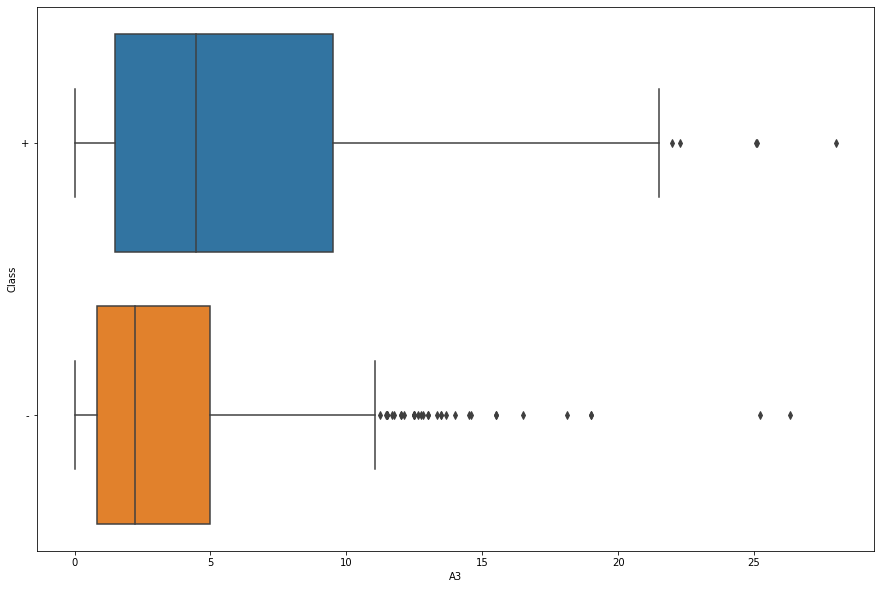

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='A3', y='Class', data=dataset) #Verificar se existe associação entre a classes + e - e os valores A3

Já nesse outro Boxplot agrupado pela coluna [Class], ao analisar o 3º quartil e o limite superior da classe [+], podemos notar que o grupo da classe [+] possuem valores consideravelmente maiores em comparação com o grupo [-].

# Transformação de Dados

Processo realizado para obter-se os dados em uma forma mais apropriada para a mineração. Alguns atributos podem possuir escalas bem distintas, como variações de idade chegando a centenas ou salários, chegando a milhares, e isto pode causar um grande problema no treino do do modelo uma vez o salário por possuir uma escala muito maior que a idade terá uma influência consequentemente muito maior no resultado. Queremos também minimizar o impacto dos outliers em nosso modelo.

Um dos principais tratamentos desta etapa é a normalização como uma das maneiras que buscamos minimizar os problemas oriundos do uso de unidades e dispersões distintas entre as variáveis.

## Normalização dos dados
> A normalização busca levar os valores das colunas a uma escala comum.
Quando a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.  Com a normalização, os algoritmos não considerarão uma coluna mais do que a outra, o que torna a acurária da mineração mais eficiente.

### Normalização de Média
> É um dos métodos mais simples. É feita subtraindo a média e dividindo pelo desvio padrão.

### Normalização Min-Max
> É um dos métodos mais atualizados.  
Subtrai o valor mínimo de um quadro de dados e divide-o pela diferença entre o valor mais alto e mais baixo da acoluna correspondente.  
Pode não ser adequada para Dataframes com muitos outliers.

### Normalização de Quantidades
> É utilizada no caso de análises de dados de alta dimensão. Onde, podemos reduzir o número de atributos.

In [10]:
# DADOS NUMÉRICOS

def mean_norm(dataset):
    return dataset.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

numerics_dataset = dataset[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
numerics_dataset = mean_norm(numerics_dataset)
numerics_dataset.head()


,A2,A3,A8,A11,A14,A15
0,-0.062276,-0.955920,-0.290872,-0.287892,0.104468,-0.195272
1,2.286443,-0.060007,0.244013,0.740293,-0.819095,-0.087788
2,-0.596306,-0.855481,-0.216167,-0.493529,0.557537,-0.037117
3,-0.315371,-0.646569,0.456175,0.534656,-0.488006,-0.194696
4,-0.961606,0.174015,-0.153415,-0.493529,-0.371835,-0.195272


In [11]:
## DADOS NUMÉRICOS NORMALIZADOS
dataset[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] = numerics_dataset[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,-0.062276,-0.955920,u,g,w,v,-0.290872,t,t,-0.287892,f,g,0.104468,-0.195272,+
1,a,2.286443,-0.060007,u,g,q,h,0.244013,t,t,0.740293,f,g,-0.819095,-0.087788,+
2,a,-0.596306,-0.855481,u,g,q,h,-0.216167,t,f,-0.493529,f,g,0.557537,-0.037117,+
3,b,-0.315371,-0.646569,u,g,w,v,0.456175,t,t,0.534656,t,g,-0.488006,-0.194696,+
4,b,-0.961606,0.174015,u,g,w,v,-0.153415,t,f,-0.493529,f,s,-0.371835,-0.195272,+


# Redução de dados e Métodos para seleção de atributos

Em muitos casos, datasets possuem um número elevado de atributos e valores e o processamento computacional se torna cada vez mais complexo. Para aumentar a eficiência e reduzir os custos computacionais, usamos o processo de redução de dados. 

A redução é, portanto, um processo que visa a obter uma representação reduzida do conjunto de dados que é muito menor no volume, mas que produz os mesmos (ou quase) resultados analíticos com as vantagens de tempo de aprendizagem reduzido e interpretação mais fácil dos conceitos aprendidos. Portanto um trabalho importante e necessário é a seleção dos atributos que mais e agregam valor em nossa solução.

> **4.1 - Redução por agregação de cubo de dados:** É a atividade de construção de um cubo de dados, um formato multidimensional que, apesar de gerar maior necessidade de armazenamento, permite um processamento mais rápido por não necessitar varrer toda a base em busca de determinado valor.

> **4.2 - Seleção de subconjunto de atributos:** É a opção por utilizar os atributos altamente relevantes em detrimento dos menos relevantes. Para realizar a seleção de atributos pode-se usar o nível de significância e o valor p do atributo. O atributo com valor p maior que o nível de significância pode ser descartado.

> **4.3 - Redução de dimensionalidade:** Reduz o tamanho dos dados por mecanismos de codificação. Pode ser com ou sem perdas. Se após a reconstrução a partir dos dados compactados, os dados originais puderem ser recuperados, essa redução será chamada de redução sem perdas. Caso contrário, será denominada redução com perdas. Os dois métodos efetivos de redução de dimensionalidade são: transformação de Wavelet e PCA (Principal Component Analysis).

> **4.4 - Redução da numerosidade:** Redução (sintetização) do volume de dados via representação econômica dos mesmos, tais como modelos paramétricos (que armazenam apenas os parâmetros do modelo em vez dos dados reais) ou métodos não paramétricos tais como agrupamento, amostragem e o uso de histogramas.


Retornando a nosso exemplo, percebemos que nosso dataset não é um destes casos que possuem muitos atributos, mas exploramos abaixo algumas das metodologias apenas como meios demonstrativos para os processos de redução.

In [12]:
# CONVERTENDO VALORES CATEGÓRICOS EM NUMÉRICOS (BINÁRIOS)
from sklearn.preprocessing import OneHotEncoder

# SELEÇÃO DE DADOS CATEGÓRICOS
attr_drop=  ['A4', 'A5', 'A6', 'A7', 'A13']
for attr in attr_drop:
  dataset.drop(attr, axis=1, inplace=True)
dataset.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,Class
0,b,-0.062276,-0.955920,-0.290872,t,t,-0.287892,f,0.104468,-0.195272,+
1,a,2.286443,-0.060007,0.244013,t,t,0.740293,f,-0.819095,-0.087788,+
2,a,-0.596306,-0.855481,-0.216167,t,f,-0.493529,f,0.557537,-0.037117,+
3,b,-0.315371,-0.646569,0.456175,t,t,0.534656,t,-0.488006,-0.194696,+
4,b,-0.961606,0.174015,-0.153415,t,f,-0.493529,f,-0.371835,-0.195272,+


In [13]:
# Armazenando atributo de classe para futura análise do PCA
class_dataset = dataset[['Class']]

In [14]:
print("selecionar apenas as colunas que sao do tipo objeto/categorigos\n")
categorical_dataset = dataset.select_dtypes(include=['object']).copy()

onehotenconder = OneHotEncoder() 
categorical_dataset = onehotenconder.fit_transform(categorical_dataset).toarray()
print(f'Os {dataset.shape[1]} atributos categóricos foram transformados em {categorical_dataset.shape[1]} Colunas')

selecionar apenas as colunas que sao do tipo objeto/categorigos

Os 11 atributos categóricos foram transformados em 11 Colunas


In [15]:
categorical_dataset = pd.DataFrame(categorical_dataset)

categorical_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


Como os algoritmos não realizam predições com atributos categóricos, o estado final do Dataset deverá ser este, com todos os atributos numéricos para que os algoritmos possam realizar predições eficientes. Com isso, este dataset se torna inelegível para análise humana, fazendo com que os dados não tenham um sentido aparente.

In [16]:
# ESTADO FINAL DO DATASET

numerics_dataset = dataset[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']]
dataset = pd.concat([categorical_dataset, numerics_dataset], axis=1) #Uma coluna ao lado da outra
dataset = pd.concat([dataset, class_dataset], axis=1)
dataset

,0,1,2,3,4,5,6,7,8,9,10,A2,A3,A8,A11,A14,A15,Class
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.062276,-0.955920,-0.290872,-0.287892,0.104468,-0.195272,+
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.286443,-0.060007,0.244013,0.740293,-0.819095,-0.087788,+
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.596306,-0.855481,-0.216167,-0.493529,0.557537,-0.037117,+
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.315371,-0.646569,0.456175,0.534656,-0.488006,-0.194696,+
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.961606,0.174015,-0.153415,-0.493529,-0.371835,-0.195272,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.884834,1.069928,-0.290872,-0.493529,0.441366,-0.195272,-
686,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.750693,-0.805262,-0.066758,-0.082255,0.092851,-0.119649,-
687,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.533032,1.755924,-0.066758,-0.287892,0.092851,-0.195080,-
688,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.151427,-0.914740,-0.652442,-0.493529,0.557537,-0.051321,-


# *Referências*

- **Pedro César Tebaldi Gomes** - *Conheça as Etapas do Pré-Processamento de dados* - Disponível em https://www.datageeks.com.br/pre-processamento-de-dados/ 
- **Caique Coelho** - *Um guia completo para o pré-processamento de dados em machine learning* -  Disponível em https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1
- **Maneesha Rajaratne** - *Data Pre Processing Techniques You Should Know* - Disponível em https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6

